In [1]:
import numpy as np
import pandas as pd
import cv2
import functools

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from model_testing import ModelSelection
from plotting import show_distribution
from plot_val import calc_roc_curve, plot_roc_curve, plot_confusion_matrix

from apply_processing import apply, resize_images, function_gray, threshold_images
from apply_processing import function_label, blur_images, adjust_contrast_images, rotated_labels
from apply_processing import filter_images, edge_images, contour_images, rotate_images

In [2]:
df = pd.read_csv("Dataset\\images_mushrooms.csv")

df.head()

,Image,Label
0,Dataset\Mushrooms\Agaricus\009_mrv34Sn4WiQ.jpg,Agaricus
1,Dataset\Mushrooms\Agaricus\010_Rk1D3EG856g.jpg,Agaricus
2,Dataset\Mushrooms\Agaricus\017_QHGfbEiWvq8.jpg,Agaricus
3,Dataset\Mushrooms\Agaricus\020_vZJfrjIwmqU.jpg,Agaricus
4,Dataset\Mushrooms\Agaricus\030_-i6kYqDvBQo.jpg,Agaricus


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   900 non-null    object
 1   Label   900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [4]:
df['Label'].value_counts()

Entoloma       100
Suillus        100
Lactarius      100
Boletus        100
Hygrocybe      100
Russula        100
Amanita        100
Agaricus       100
Cortinarius    100
Name: Label, dtype: int64

# Processing the images

## No Augmentation

In [5]:
# Fixed contrast, brightness, sharpness

def processing_noAug(df):
    images = df['Image']
    labels = df["Label"]
    
    size = (150, 150)
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=1.75, brightness=20)
    mod_images = blur_images(mod_images)
    
    return mod_images, labels

images_noAug, labels_noAug = processing_noAug(df)

## Augmentation function

In [6]:
# Canny + fixed contrast & brightness

def processing_canny(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = 1.75
    brightness = 20
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    mod_images = edge_images(mod_images, edge=cv2.Canny)
    
    return list(mod_images)

In [7]:
# Threshold otsu + fixed contrast & brightness

def processing_threshold(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = 1.75
    brightness = 20
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    
    mod_images = threshold_images(mod_images, threshold_type=cv2.THRESH_BINARY-cv2.THRESH_OTSU)
    
    return list(mod_images)

In [8]:
# Laplacian + fixed contrast & brightness

def processing_laplacian(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = 1.75
    brightness = 20
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    mod_images = edge_images(mod_images, edge=cv2.Laplacian, ddepth=50)
    
    return list(mod_images)

In [9]:
# Sobelx + fixed contrast & brightness

def processing_sobelx(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = 1.75
    brightness = 20
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    mod_images = edge_images(mod_images, edge=cv2.Sobel, dx=1)
    
    return list(mod_images)

In [10]:
# Sobely + fixed contrast & brightness

def processing_sobely(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = 1.75
    brightness = 20
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    mod_images = edge_images(mod_images, edge=cv2.Sobel, dy=1)
    
    return list(mod_images)

In [11]:
# Sobelxy + fixed contrast & brightness

def processing_sobelxy(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = 1.75
    brightness = 20
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    mod_images = edge_images(mod_images, edge=cv2.Sobel, dx=1, dy=1)
    
    return list(mod_images)

In [12]:
# Fixed contrast & brightness

def processing_fixed(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = 1.75
    brightness = 20
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    
    return list(mod_images)

In [13]:
# Random contrast & brightness

def processing_random(df):
    images = df['Image']
    
    size = (150, 150)
    contrast = np.random.randint(1, 5)
    brightness = np.random.randint(-100, 100)
    
    mod_images = function_gray(images)
    mod_images = resize_images(mod_images, size)
    mod_images = filter_images(mod_images)
    mod_images = adjust_contrast_images(mod_images, contrast=contrast, brightness=brightness)
    mod_images = blur_images(mod_images)
    
    return list(mod_images)

In [15]:
functions = [processing_canny, processing_threshold, processing_laplacian, 
             processing_sobelx, processing_sobely, processing_sobelxy, 
             processing_fixed, processing_random]

labels = [function_label, function_label, function_label, 
          function_label, function_label, function_label, 
          function_label, function_label]

images_aug, labels_aug = apply(functions, labels, df)

C:\Users\Bina Umat\Desktop\Python\Data Science\Kaggle Dataset\Mushrooms Classification\Computer Vision\apply_processing.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  thresh = np.array(thresh_images)[:, 0]
C:\Users\Bina Umat\Desktop\Python\Data Science\Kaggle Dataset\Mushrooms Classification\Computer Vision\apply_processing.py:158: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mod_images = np.array(thresh_images)[:, 1]


# Images info

In [16]:
print(f"Length of images no augmentation {len(images_noAug)}")
print(f"Length of images with augmentation {len(images_aug)}")

Length of images no augmentation 900
Length of images with augmentation 7200


## Images info no augmentation

In [17]:
# show_distribution(images_noAug)

## Images info augmentation

In [18]:
# show_distribution(images_aug)

# Modelling with no augmentation

## Reduction with PCA

In [19]:
scaler = MinMaxScaler()
le = LabelEncoder()

pca = PCA(n_components=100)

In [20]:
images = [np.ravel(image) for image in images_noAug]

images_scaled = scaler.fit_transform(images)
labels_encoded = le.fit_transform(df["Label"])

In [21]:
images_pca = pca.fit_transform(images_scaled, labels_encoded)

images_pca_df = pd.DataFrame(data=images_pca)
images_pca_df["Label"] = le.inverse_transform(labels_encoded)

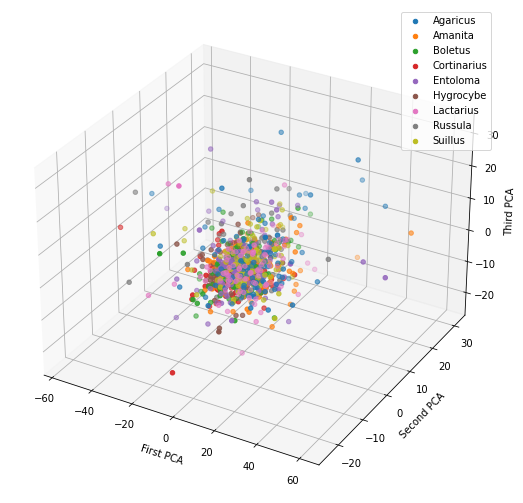

In [22]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(projection='3d')

for label in images_pca_df["Label"].unique():
    first_pca = images_pca_df[images_pca_df["Label"] == label][0]
    second_pca = images_pca_df[images_pca_df["Label"] == label][1]
    third_pca = images_pca_df[images_pca_df["Label"] == label][2]
    
    ax.scatter(first_pca, second_pca, third_pca, label=label)
    
ax.legend()

ax.set_xlabel("First PCA")
ax.set_ylabel("Second PCA")
ax.set_zlabel("Third PCA")

plt.show()

## Modelling

In [23]:
X = images_pca_df.drop(columns=["Label"])
y = pd.Series(le.fit_transform(images_pca_df["Label"]))

### Using train_test_split

In [24]:
selection = ModelSelection(X, y, [RandomForestClassifier(), DecisionTreeClassifier(), MLPClassifier(), SVC()])

In [25]:
selection.use_train_test_split()

Model info
--------------------
Model name : RandomForestClassifier
Model name : DecisionTreeClassifier
Model name : MLPClassifier
Model name : SVC

Training models
--------------------
Done Training RandomForestClassifier in time:0.6670215129852295
Done Training DecisionTreeClassifier in time:0.7280128002166748


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done Training MLPClassifier in time:2.3328588008880615
Done Training SVC in time:2.519909381866455
--------------------
Done Training models in time : 2.519909381866455


The Scores :

Train RandomForestClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
Train MLPClassifier score : 0.9900497512437811
Train SVC score : 0.8076285240464345
----------
Test RandomForestClassifier score : 0.18855218855218855
Test DecisionTreeClassifier score : 0.15151515151515152
Test MLPClassifier score : 0.15151515151515152
Test SVC score : 0.17845117845117844
----------
Bias RandomForestClassifier score : 0.8114478114478114
Bias DecisionTreeClassifier score : 0.8484848484848485
Bias MLPClassifier score : 0.8385345997286296
Bias SVC score : 0.6291773455952561
----------


### Using StratifiedKFold

In [26]:
selection = ModelSelection(X, y, [RandomForestClassifier(), DecisionTreeClassifier(), MLPClassifier(), SVC()])

In [27]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training RandomForestClassifier in time:0.7620134353637695

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.18888888888888888
Bias RandomForestClassifier score : 0.8111111111111111

--------------------
Done Training DecisionTreeClassifier in time:0.8420093059539795

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.16666666666666666
Bias DecisionTreeClassifier score : 0.8333333333333334


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:2.6028456687927246

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 0.16111111111111112
Bias MLPClassifier score : 0.8388888888888889

--------------------
Done Training SVC in time:2.844832181930542

The Scores :

Train SVC score : 0.7888888888888889
Test SVC score : 0.2222222222222222
Bias SVC score : 0.5666666666666667
--------------------
Done Training models in time : 2.844832181930542

Fold 2
----------

Training models

--------------------
Done Training RandomForestClassifier in time:0.7850120067596436

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.17777777777777778
Bias RandomForestClassifier score : 0.8222222222222222

--------------------
Done Training DecisionTreeClassifier in time:0.8650102615356445

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.07777777777777778
Bias DecisionTreeClassifier score : 

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:2.5708465576171875

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 0.12777777777777777
Bias MLPClassifier score : 0.8722222222222222

--------------------
Done Training SVC in time:2.819831132888794

The Scores :

Train SVC score : 0.8097222222222222
Test SVC score : 0.18333333333333332
Bias SVC score : 0.6263888888888889
--------------------
Done Training models in time : 2.819831132888794

Fold 3
----------

Training models

--------------------
Done Training RandomForestClassifier in time:0.7540140151977539

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.18888888888888888
Bias RandomForestClassifier score : 0.8111111111111111

--------------------
Done Training DecisionTreeClassifier in time:0.8269517421722412

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.15555555555555556
Bias DecisionTreeClassifier score :

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:2.5719101428985596

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 0.18333333333333332
Bias MLPClassifier score : 0.8166666666666667

--------------------
Done Training SVC in time:2.8128318786621094

The Scores :

Train SVC score : 0.8138888888888889
Test SVC score : 0.25
Bias SVC score : 0.5638888888888889
--------------------
Done Training models in time : 2.8128318786621094

Fold 4
----------

Training models

--------------------
Done Training RandomForestClassifier in time:0.7689719200134277

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.12777777777777777
Bias RandomForestClassifier score : 0.8722222222222222

--------------------
Done Training DecisionTreeClassifier in time:0.8399853706359863

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.12222222222222222
Bias DecisionTreeClassifier score : 0.8777777777

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:2.5728211402893066

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 0.15555555555555556
Bias MLPClassifier score : 0.8444444444444444

--------------------
Done Training SVC in time:2.8098087310791016

The Scores :

Train SVC score : 0.7791666666666667
Test SVC score : 0.18333333333333332
Bias SVC score : 0.5958333333333333
--------------------
Done Training models in time : 2.8118231296539307

Fold 5
----------

Training models

--------------------
Done Training RandomForestClassifier in time:0.7290165424346924

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.16111111111111112
Bias RandomForestClassifier score : 0.8388888888888889

--------------------
Done Training DecisionTreeClassifier in time:0.8040118217468262

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.14444444444444443
Bias DecisionTreeClassifier score

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:2.555845022201538

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 0.16111111111111112
Bias MLPClassifier score : 0.8388888888888889

--------------------
Done Training SVC in time:2.7918312549591064

The Scores :

Train SVC score : 0.8208333333333333
Test SVC score : 0.18888888888888888
Bias SVC score : 0.6319444444444444
--------------------
Done Training models in time : 2.7918312549591064


The Mean Scores :

Train mean RandomForestClassifier score : 1.0
Train mean DecisionTreeClassifier score : 1.0
Train mean MLPClassifier score : 1.0
Train mean SVC score : 0.8208333333333333
----------
Test mean RandomForestClassifier score : 0.16111111111111112
Test mean DecisionTreeClassifier score : 0.14444444444444443
Test mean MLPClassifier score : 0.16111111111111112
Test mean SVC score : 0.18888888888888888
----------
Bias mean RandomForestClassifier score : 0.8388888888888889
Bias mean DecisionTreeClassifie

## Evaluation

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()
mlpc = MLPClassifier()
rfc = RandomForestClassifier()

In [30]:
svm.fit(X_train, y_train)
dtc.fit(X_train, y_train)
mlpc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier()

### ROC Curve and AUC

In [31]:
svm_proba = svm.predict_proba(X_test)
dtc_proba = dtc.predict_proba(X_test)
mlpc_proba = mlpc.predict_proba(X_test)
rfc_proba = rfc.predict_proba(X_test)

In [32]:
fprs_svm, tprs_svm, aucs_svm = calc_roc_curve(y_test, svm_proba)
fprs_dtc, tprs_dtc, aucs_dtc = calc_roc_curve(y_test, dtc_proba)
fprs_mlpc, tprs_mlpc, aucs_mlpc = calc_roc_curve(y_test, mlpc_proba)
fprs_rfc, tprs_rfc, aucs_rfc = calc_roc_curve(y_test, rfc_proba)

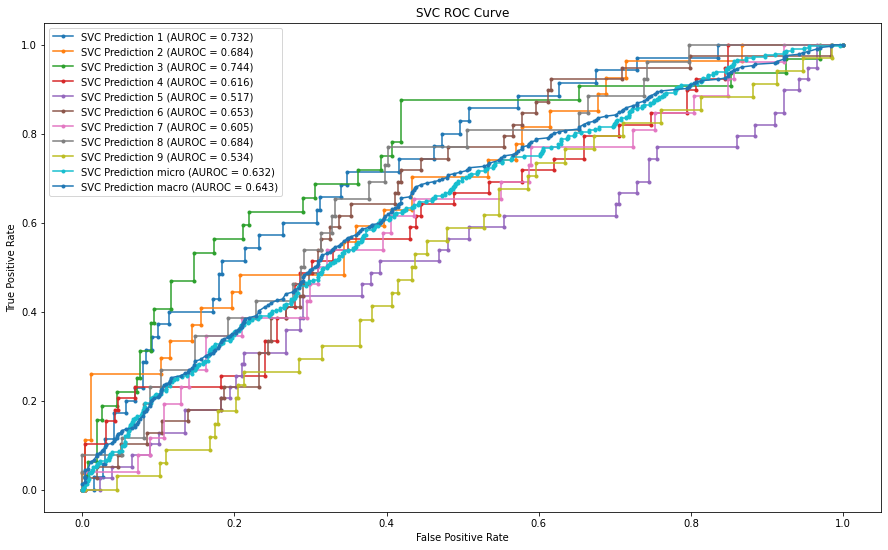

In [33]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_svm, tprs_svm, aucs_svm, "SVC")

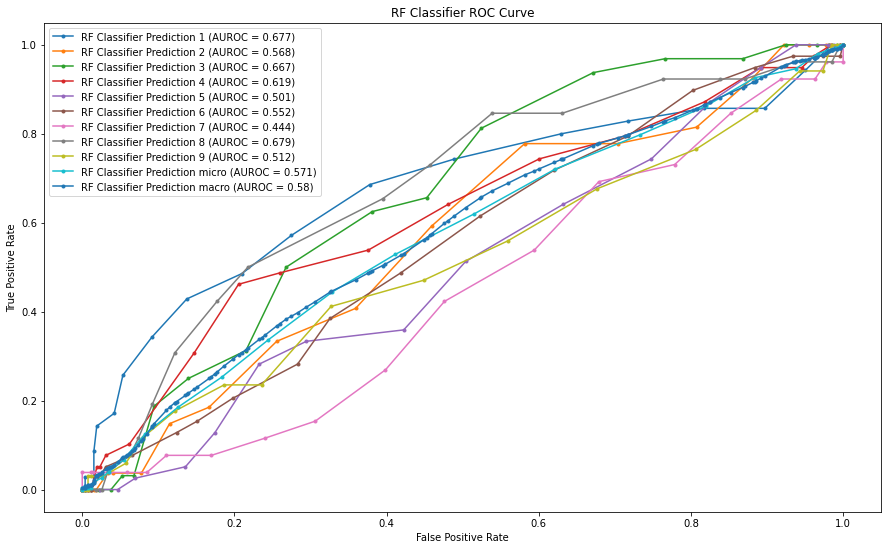

In [34]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_rfc, tprs_rfc, aucs_rfc, "RF Classifier")

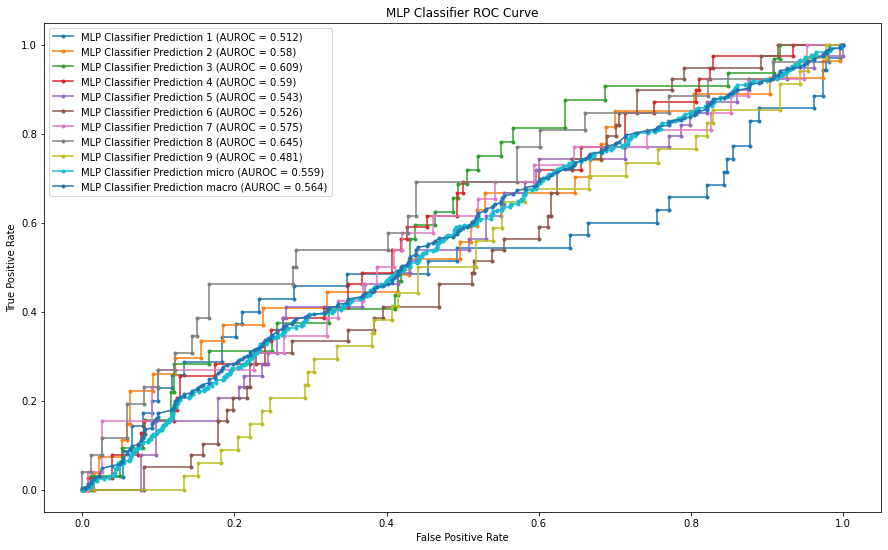

In [35]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_mlpc, tprs_mlpc, aucs_mlpc, "MLP Classifier")

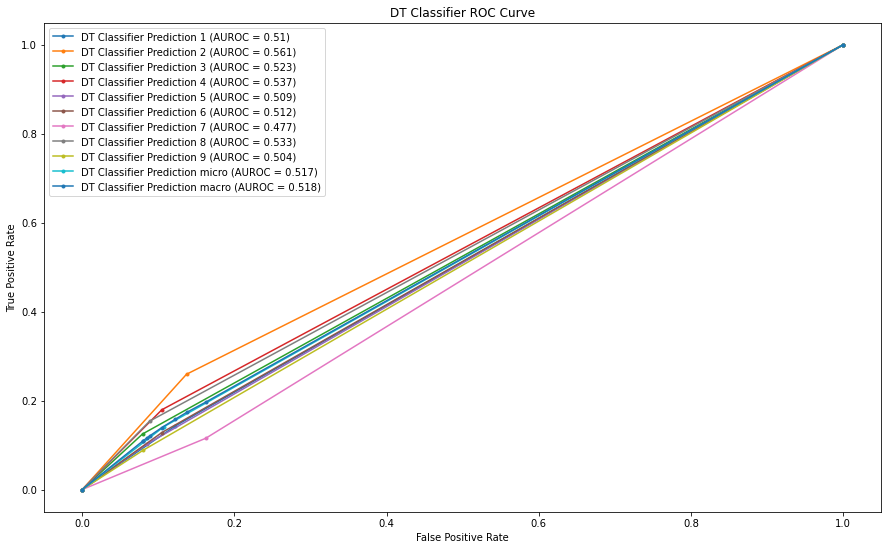

In [36]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_dtc, tprs_dtc, aucs_dtc, "DT Classifier")

### Confusion Matrix

In [37]:
svm_pred = svm.predict(X_test)
dtc_pred = dtc.predict(X_test)
mlpc_pred = mlpc.predict(X_test)
rfc_pred = rfc.predict(X_test)

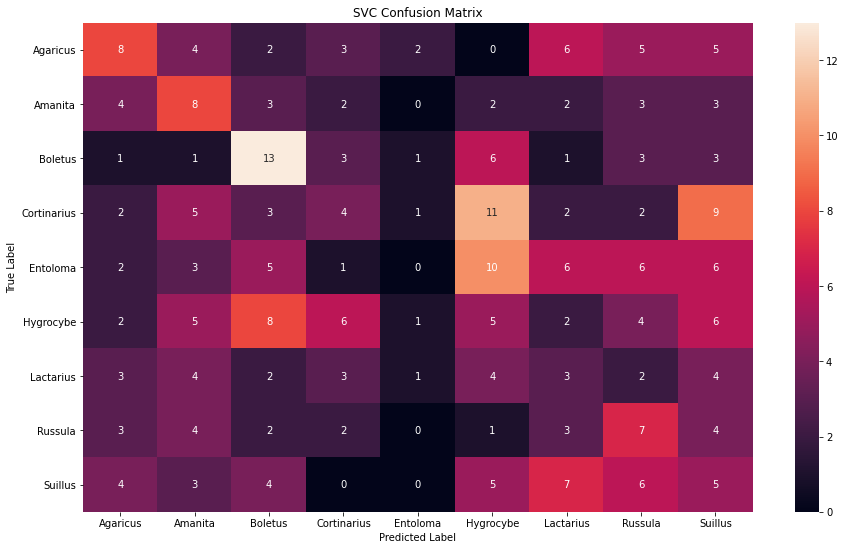

In [38]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, svm_pred, 'SVC')

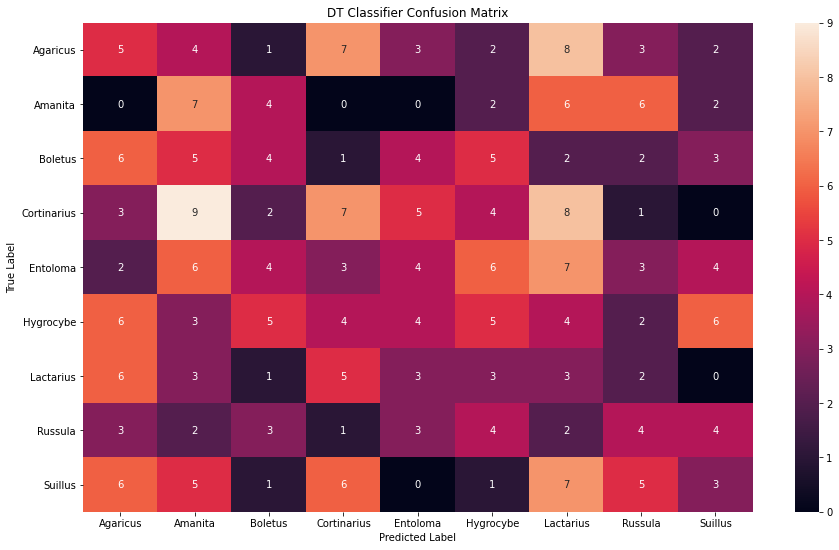

In [39]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, dtc_pred, 'DT Classifier')

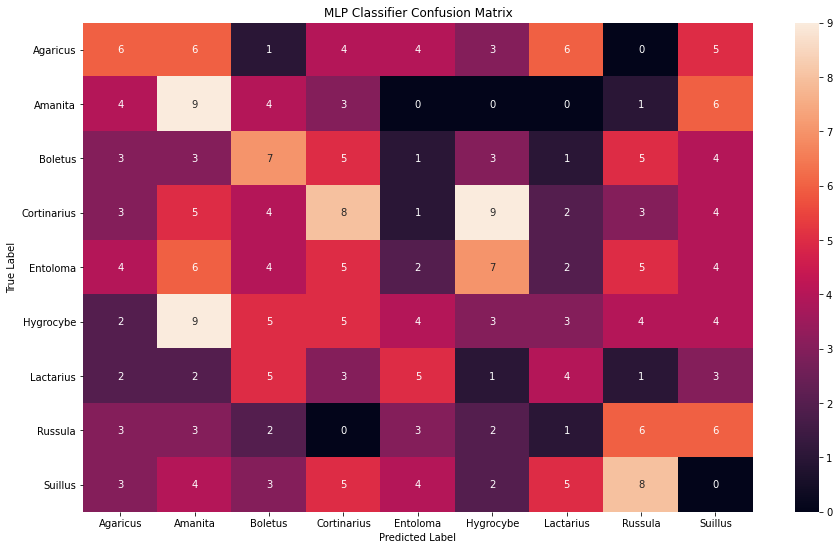

In [40]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, mlpc_pred, 'MLP Classifier')

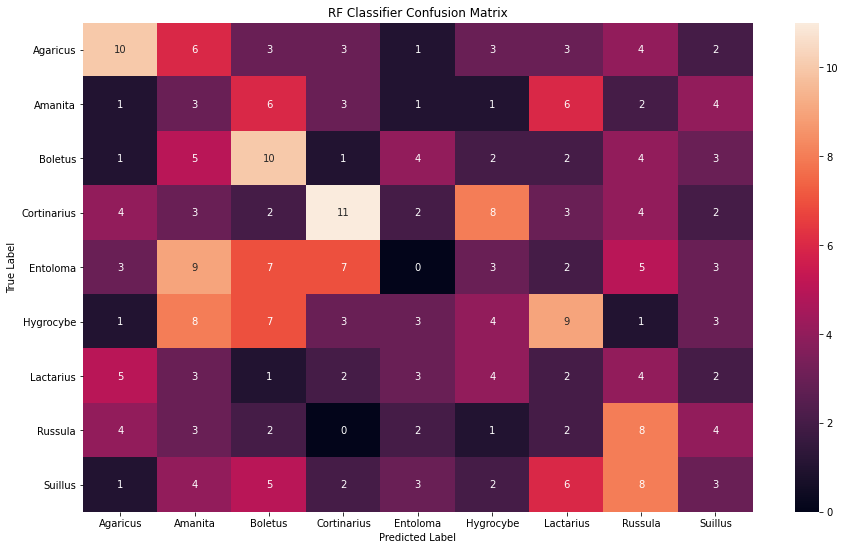

In [41]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, rfc_pred, 'RF Classifier')

# Modelling with augmentation

## Reduction with PCA

In [42]:
scaler = MinMaxScaler()
le = LabelEncoder()

pca = PCA(n_components=100)

In [43]:
images = [np.ravel(image) for image in images_aug]

images_scaled = scaler.fit_transform(images)
labels_encoded = le.fit_transform(labels_aug)

In [44]:
images_pca = pca.fit_transform(images_scaled, labels_encoded)

images_pca_df = pd.DataFrame(data=images_pca)
images_pca_df["Label"] = le.inverse_transform(labels_encoded)

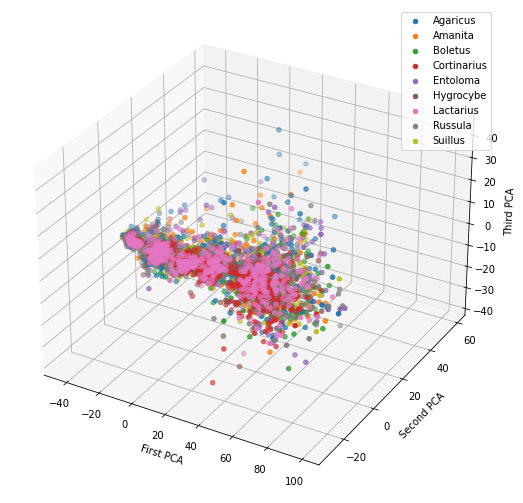

In [45]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(projection='3d')

for label in images_pca_df["Label"].unique():
    first_pca = images_pca_df[images_pca_df["Label"] == label][0]
    second_pca = images_pca_df[images_pca_df["Label"] == label][1]
    third_pca = images_pca_df[images_pca_df["Label"] == label][2]
    
    ax.scatter(first_pca, second_pca, third_pca, label=label)
    
ax.legend()

ax.set_xlabel("First PCA")
ax.set_ylabel("Second PCA")
ax.set_zlabel("Third PCA")

plt.show()

## Modelling

In [46]:
X = images_pca_df.drop(columns=["Label"])
y = pd.Series(le.fit_transform(images_pca_df["Label"]))

### Using train_test_split

In [47]:
selection = ModelSelection(X, y, [RandomForestClassifier(), DecisionTreeClassifier(), MLPClassifier(), SVC()])

In [48]:
selection.use_train_test_split()

Model info
--------------------
Model name : RandomForestClassifier
Model name : DecisionTreeClassifier
Model name : MLPClassifier
Model name : SVC

Training models
--------------------
Done Training RandomForestClassifier in time:6.204237222671509
Done Training DecisionTreeClassifier in time:6.921575546264648


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done Training MLPClassifier in time:18.526660919189453
Done Training SVC in time:31.788561582565308
--------------------
Done Training models in time : 31.788561582565308


The Scores :

Train RandomForestClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
Train MLPClassifier score : 0.8951077943615257
Train SVC score : 0.37893864013267
----------
Test RandomForestClassifier score : 0.3489057239057239
Test DecisionTreeClassifier score : 0.1813973063973064
Test MLPClassifier score : 0.39141414141414144
Test SVC score : 0.22432659932659932
----------
Bias RandomForestClassifier score : 0.6510942760942762
Bias DecisionTreeClassifier score : 0.8186026936026936
Bias MLPClassifier score : 0.5036936529473842
Bias SVC score : 0.15461204080607066
----------


### Using StratifiedKFold

In [49]:
selection = ModelSelection(X, y, [RandomForestClassifier(), DecisionTreeClassifier(), MLPClassifier(), SVC()])

In [50]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training RandomForestClassifier in time:7.77070426940918

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.3902777777777778
Bias RandomForestClassifier score : 0.6097222222222223

--------------------
Done Training DecisionTreeClassifier in time:8.708691835403442

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.21180555555555555
Bias DecisionTreeClassifier score : 0.7881944444444444


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:22.718814373016357

The Scores :

Train MLPClassifier score : 0.9045138888888888
Test MLPClassifier score : 0.42916666666666664
Bias MLPClassifier score : 0.4753472222222222

--------------------
Done Training SVC in time:39.9458532333374

The Scores :

Train SVC score : 0.3940972222222222
Test SVC score : 0.24444444444444444
Bias SVC score : 0.14965277777777777
--------------------
Done Training models in time : 39.9458532333374

Fold 2
----------

Training models

--------------------
Done Training RandomForestClassifier in time:7.4946129322052

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.41041666666666665
Bias RandomForestClassifier score : 0.5895833333333333

--------------------
Done Training DecisionTreeClassifier in time:8.356501340866089

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.19652777777777777
Bias DecisionTreeClassifi

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:22.100091695785522

The Scores :

Train MLPClassifier score : 0.9105902777777778
Test MLPClassifier score : 0.41944444444444445
Bias MLPClassifier score : 0.49114583333333334

--------------------
Done Training SVC in time:38.72134518623352

The Scores :

Train SVC score : 0.39739583333333334
Test SVC score : 0.2534722222222222
Bias SVC score : 0.14392361111111113
--------------------
Done Training models in time : 38.72329020500183

Fold 3
----------

Training models

--------------------
Done Training RandomForestClassifier in time:7.549355506896973

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.41388888888888886
Bias RandomForestClassifier score : 0.5861111111111111

--------------------
Done Training DecisionTreeClassifier in time:8.419373989105225

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.19027777777777777
Bias DecisionTreeCla

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:22.52981185913086

The Scores :

Train MLPClassifier score : 0.9151041666666667
Test MLPClassifier score : 0.44305555555555554
Bias MLPClassifier score : 0.4720486111111112

--------------------
Done Training SVC in time:38.894734144210815

The Scores :

Train SVC score : 0.39739583333333334
Test SVC score : 0.23819444444444443
Bias SVC score : 0.1592013888888889
--------------------
Done Training models in time : 38.894734144210815

Fold 4
----------

Training models

--------------------
Done Training RandomForestClassifier in time:7.343428611755371

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.3875
Bias RandomForestClassifier score : 0.6125

--------------------
Done Training DecisionTreeClassifier in time:8.217148542404175

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.19722222222222222
Bias DecisionTreeClassifier score : 0.8027777

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:22.073110103607178

The Scores :

Train MLPClassifier score : 0.9125
Test MLPClassifier score : 0.4465277777777778
Bias MLPClassifier score : 0.4659722222222222

--------------------
Done Training SVC in time:38.70918321609497

The Scores :

Train SVC score : 0.4005208333333333
Test SVC score : 0.24027777777777778
Bias SVC score : 0.16024305555555554
--------------------
Done Training models in time : 38.71012043952942

Fold 5
----------

Training models

--------------------
Done Training RandomForestClassifier in time:7.366624593734741

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 0.43472222222222223
Bias RandomForestClassifier score : 0.5652777777777778

--------------------
Done Training DecisionTreeClassifier in time:8.25457215309143

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 0.21180555555555555
Bias DecisionTreeClassifier score :

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:21.980018615722656

The Scores :

Train MLPClassifier score : 0.9109375
Test MLPClassifier score : 0.4625
Bias MLPClassifier score : 0.44843749999999993

--------------------
Done Training SVC in time:38.50449180603027

The Scores :

Train SVC score : 0.3975694444444444
Test SVC score : 0.25069444444444444
Bias SVC score : 0.14687499999999998
--------------------
Done Training models in time : 38.50449180603027


The Mean Scores :

Train mean RandomForestClassifier score : 1.0
Train mean DecisionTreeClassifier score : 1.0
Train mean MLPClassifier score : 0.9109375
Train mean SVC score : 0.3975694444444444
----------
Test mean RandomForestClassifier score : 0.43472222222222223
Test mean DecisionTreeClassifier score : 0.21180555555555555
Test mean MLPClassifier score : 0.4625
Test mean SVC score : 0.25069444444444444
----------
Bias mean RandomForestClassifier score : 0.5652777777777778
Bias mean DecisionTreeClassifier score : 0.7

## Evaluation

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()
mlpc = MLPClassifier()
rfc = RandomForestClassifier()

In [53]:
svm.fit(X_train, y_train)
dtc.fit(X_train, y_train)
mlpc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier()

### ROC Curve and AUC

In [54]:
svm_proba = svm.predict_proba(X_test)
dtc_proba = dtc.predict_proba(X_test)
mlpc_proba = mlpc.predict_proba(X_test)
rfc_proba = rfc.predict_proba(X_test)

In [55]:
fprs_svm, tprs_svm, aucs_svm = calc_roc_curve(y_test, svm_proba)
fprs_dtc, tprs_dtc, aucs_dtc = calc_roc_curve(y_test, dtc_proba)
fprs_mlpc, tprs_mlpc, aucs_mlpc = calc_roc_curve(y_test, mlpc_proba)
fprs_rfc, tprs_rfc, aucs_rfc = calc_roc_curve(y_test, rfc_proba)

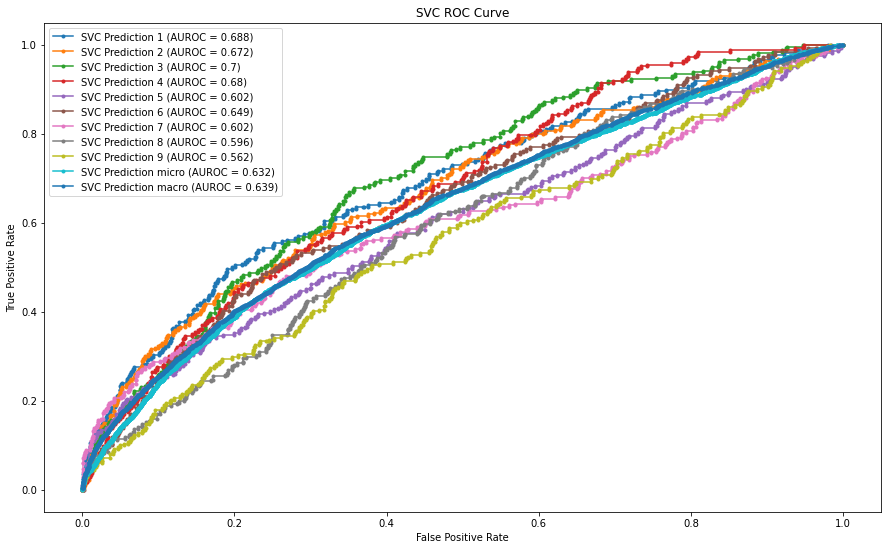

In [56]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_svm, tprs_svm, aucs_svm, "SVC")

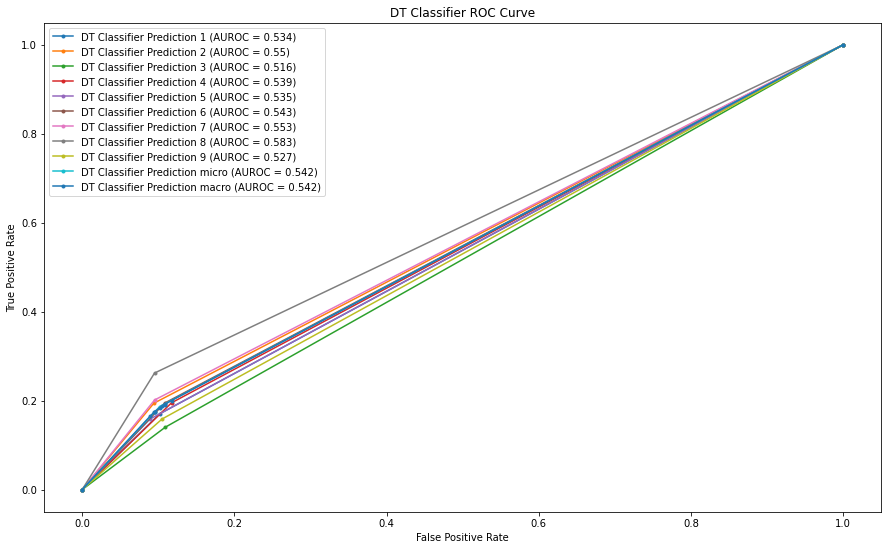

In [57]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_dtc, tprs_dtc, aucs_dtc, "DT Classifier")

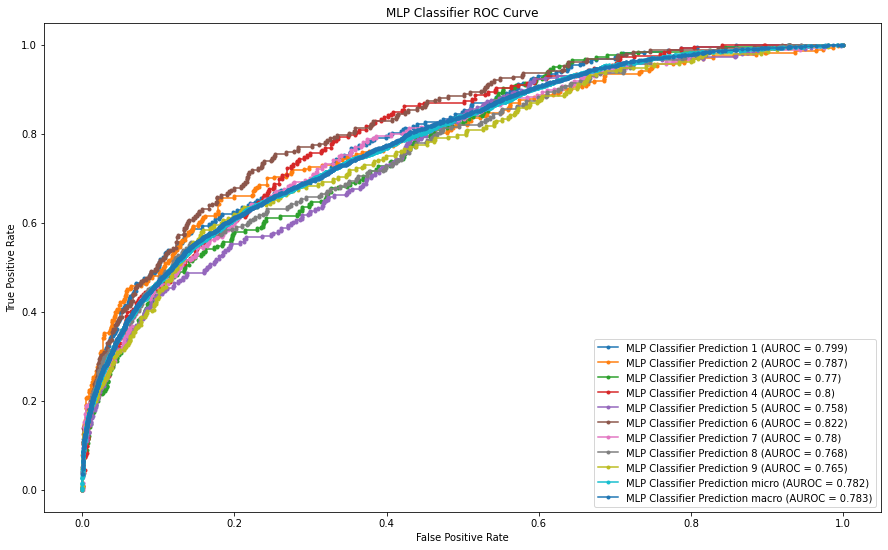

In [58]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_mlpc, tprs_mlpc, aucs_mlpc, "MLP Classifier")

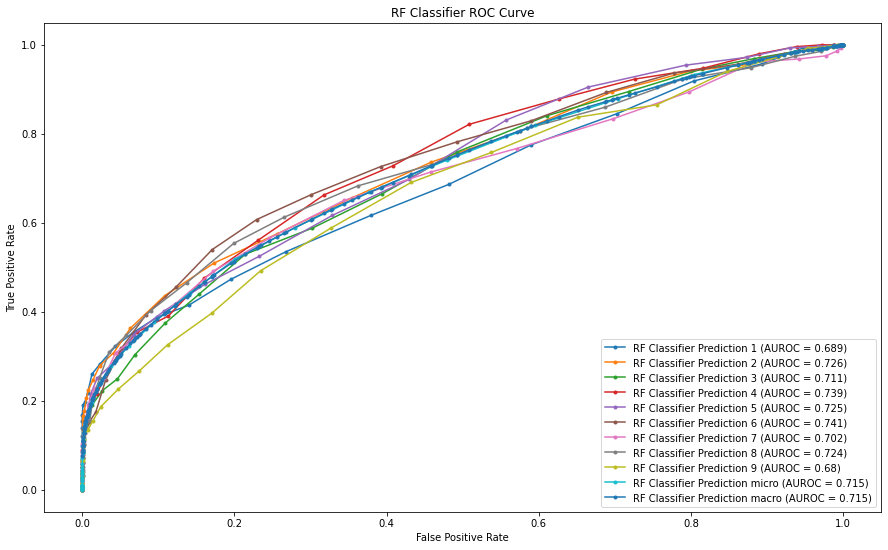

In [59]:
fig = plt.figure(figsize=(15, 9))

plot_roc_curve(fprs_rfc, tprs_rfc, aucs_rfc, "RF Classifier")

### Confusion Matrix

In [60]:
svm_pred = svm.predict(X_test)
dtc_pred = dtc.predict(X_test)
mlpc_pred = mlpc.predict(X_test)
rfc_pred = rfc.predict(X_test)

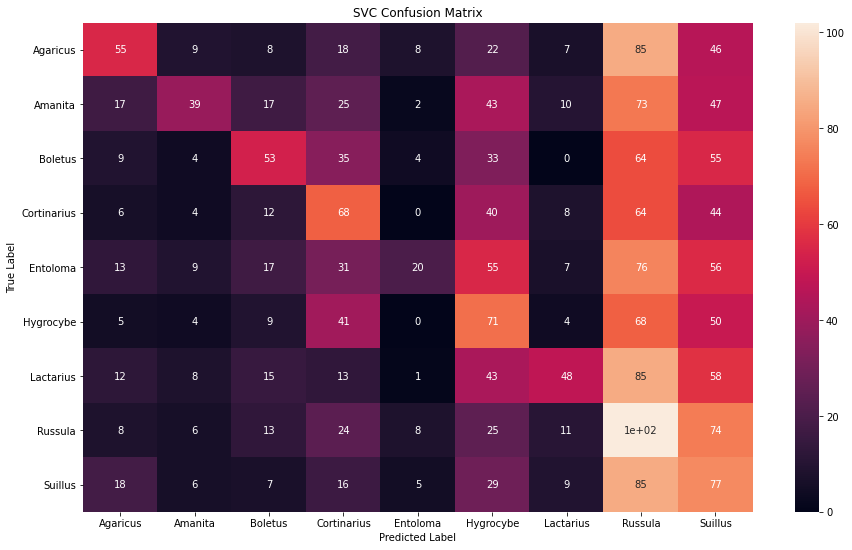

In [61]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, svm_pred, 'SVC')

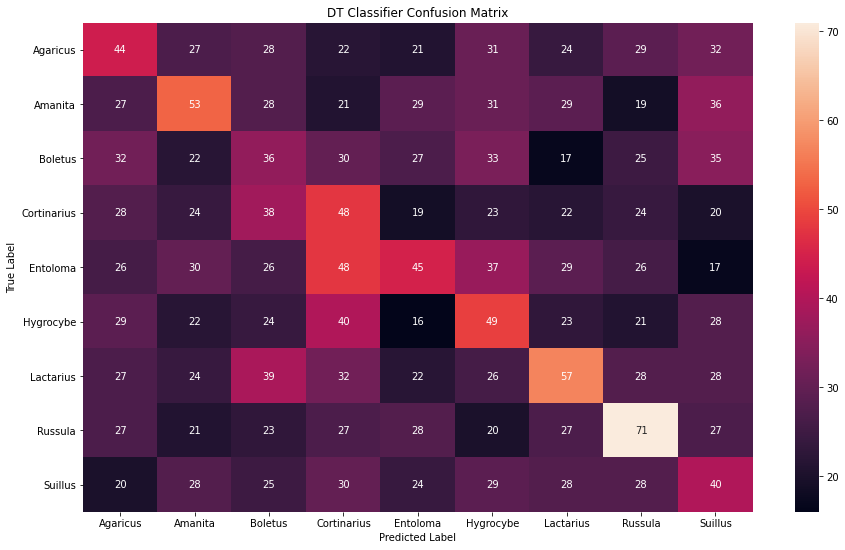

In [62]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, dtc_pred, 'DT Classifier')

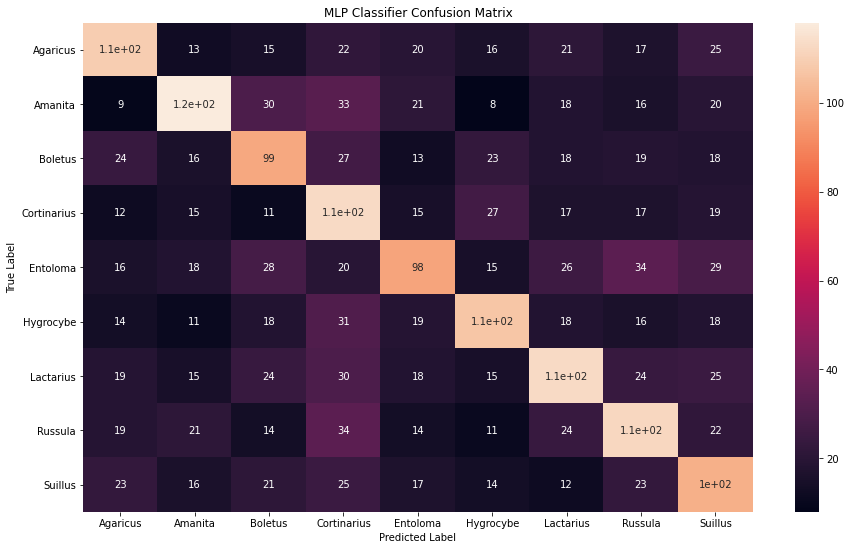

In [63]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, mlpc_pred, 'MLP Classifier')

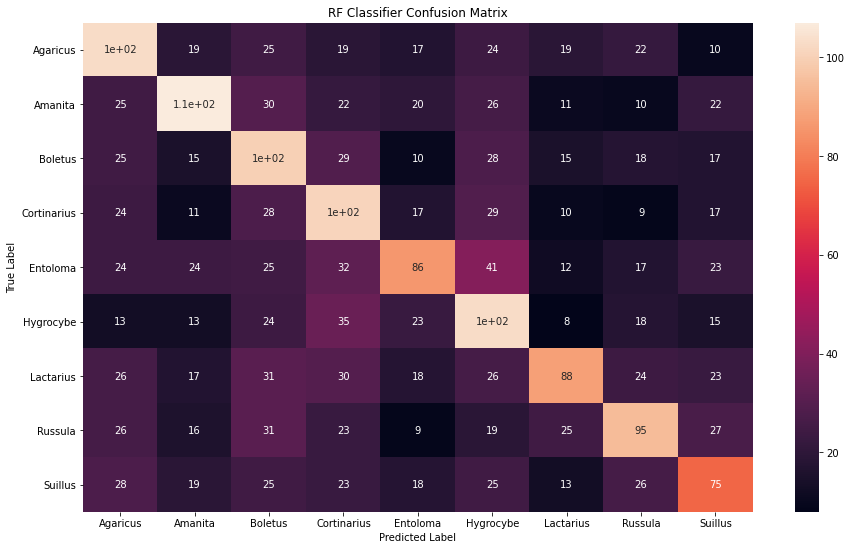

In [64]:
fig = plt.figure(figsize=(15, 9))

plot_confusion_matrix(df["Label"], y_test, rfc_pred, 'RF Classifier')